# Tarefa 1

##Parte 1


Substituir a onda plana na equação de onda  leva à chamada equação de Christoffel para a velocidade de fase $V$ e o vetor de polarização $\mathbf{U}$ :
\
\
$$
\left[\begin{array}{ccc}
G_{11}-\rho V^2 & G_{12} & G_{13} \\
G_{21} & G_{22}-\rho V^2 & G_{23} \\
G_{31} & G_{32} & G_{33}-\rho V^2
\end{array}\right]\left[\begin{array}{c}
U_1 \\
U_2 \\
U_3
\end{array}\right]=0
$$
\
Os autovalores são obtidos por
$$
\operatorname{det}\left[G_{i k}-\rho V^2 \delta_{i k}\right]=0 \text {, }
$$

Para iniciar o processo de resolução deste problema, vamos resolver para o meio TI no plano $x_1 - x_3$ considerando o ângulo teta variando de 0º a 90º para a incidência da onda, vamos encontrar as velocidades VP, VSH e VSV de acordo com a polarização , para a polarização $U_1$ temos a onda P, para $U_2$ a onda SH e $U_3$ a onda SV
\
\
Aqui $G_{ik}$ é a matriz de Christoffel, que depende das propriedades do meio (rigidez) e da direção de propagação da onda para o meio TI que temos:
\
$$  G_{11} =  C_{11} n_1^2 + C_{66}n_2^2 + C_{55}n_3^2 \\
    G_{22} =  C_{66} n_1^2 + C_{11}n_2^2 + C_{55}n_3^2 \\
    G_{33} =  C_{55}( n_1^2 + n_2^2)  + C_{33}n_3^2 \\
    G_{12} =  (C_{11} - C_{66})n_1 n_2\\
    G_{13} =  (C_{13} + C_{55})n_1 n_3\\
    G_{23} =  (C_{13} - C_{55})n_2 n_3\\
$$
Como no meio TI todos os planos que contêm o eixo de simetria são equivalentes, é suficiente estudar a propagação das ondas em um único plano vertical. Escolher o plano $[x_1,x_3]$ $(n_2 = 0)$ e substituir as equações acima na equação de Christoffel produz
\
$$
\begin{bmatrix}
C_{11}n_1^2 C_{55}n_3^2- \rho V^2 & 0  & (C_{13}+ C_{55})n_1n_3 \\
0 & C_{66}n_1^2 C_{55}n_3^2- \rho V^2 & 0 \\
 (C_{13}+ C_{55})n_1n_3 & 0  & C_{55}n_1^2 C_{33}n_3^2- \rho V^2
\end{bmatrix} \cdot \begin{bmatrix} U_1 \\ U_2 \\ U_3 \end{bmatrix}= 0
$$
\
Expressar o vetor unitário n na equação em termos do ângulo de fase $\theta$ com o eixo de simetria $n_1 = sin(\theta)$ ; $n_3 = cos(\theta)$
\
$$
\begin{bmatrix}
C_{11} sin(\theta)^2 C_{55}cos(\theta)^2- \rho V^2 & 0  & (C_{13}+ C_{55})sin(\theta)cos(\theta) \\
0 & C_{66}sin(\theta)^2 C_{55}cos(\theta)^2- \rho V^2 & 0 \\
 (C_{13}+ C_{55})sin(\theta)cos(\theta) & 0  & C_{55}sin(\theta)^2 C_{33}cos(\theta)^2- \rho V^2
\end{bmatrix} \cdot \begin{bmatrix} U_1 \\ U_2 \\ U_3 \end{bmatrix}= 0
$$
O objetivo da tarefa é encontrar as velocidades VP, VSH e VSV para os ângulos $\theta$ entre $0^o$ e $90^0$
graus.
\
\
Então será resolvido o sistema 3x3 simbolicamente usando o pacote Sympy, onde o vetor velocidade V será solução e o restante serão variáveis constantes. Para solução de ondas planas em meios VTI tem-se:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix, sin, cos, det, solve, rad

# Def que calcula as soluções do sistema de forma simbolica para Vp, Vsh Vsv

def calcular_solucoes_V(C11, C13, C33, C55, C66, thetas, rho):
    V = symbols("V")
    Vp  = []
    Vsv = []
    Vsh = []

    for theta in thetas:
        theta_rad = rad(theta)  # Converte ângulo para radianos
        matriz = Matrix([[C11*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2, 0, (C13 + C55)*sin(theta_rad)*cos(theta_rad)],
                         [0, C66*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2,0],
                         [(C13 + C55)*sin(theta_rad)*cos(theta_rad),0, C55*sin(theta_rad)**2 + C33*cos(theta_rad)**2 - rho*V**2]])
        solucao_V = solve(det(matriz), V**2)
        #if solucao_V:
        Vsv.append(np.sqrt(float(solucao_V[0])))
        Vsh.append(np.sqrt(float(solucao_V[1])))
        Vp.append(np.sqrt(float(solucao_V[-1])))

    return Vsv, Vsh, Vp

In [3]:
# Teste
# Parâmetros fornecidos
rho = 2300  # kg/m^3
C11 = 25*1e9  # GPa
C33 = 20*1e9  # GPa
C55 = 12*1e9  # GPa
C13 = 16*1e9  # GPa
C66 = 14*1e9  # GPa
# Ângulos de 0 a 90 graus
thetas = np.linspace(0,90,50)

V = symbols("V")
Vp  = []
Vsv = []
Vsh = []

for theta in thetas:
  theta_rad = rad(theta)  # Converte ângulo para radianos
  matriz = Matrix([[C11*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2, 0, (C13 + C55)*sin(theta_rad)*cos(theta_rad)],
                         [0, C66*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2,0],
                         [(C13 + C55)*sin(theta_rad)*cos(theta_rad),0, C55*sin(theta_rad)**2 + C33*cos(theta_rad)**2 - rho*V**2]])
  solucao_V = solve(det(matriz), V**2)
        #if solucao_V:
  Vsv.append(np.sqrt(float(solucao_V[0])))
  Vsh.append(np.sqrt(float(solucao_V[1])))
  Vp.append(np.sqrt(float(solucao_V[-1])))

solucao_V



[5217391.30434783, 6086956.52173913, 10869565.2173913]

In [11]:
# Parâmetros fornecidos
rho = 2300  # kg/m^3
C11 = 25*1e9  # GPa
C33 = 20*1e9  # GPa
C55 = 12*1e9  # GPa
C13 = 16*1e9  # GPa
C66 = 14*1e9  # GPa
# Ângulos de 0 a 90 graus
thetas = np.linspace(0,90,50)

Vsv, Vsh, Vp = calcular_solucoes_V(C11, C13, C33, C55,C66, thetas, rho)

In [12]:
#Vp0   = np.sqrt(C33/rho)
#Vsv0  = np.sqrt(C55/rho)
#Vp90  = np.sqrt(C11/rho)
#Vsv90 = np.sqrt(C55/rho)
Vsh0  = np.sqrt(C55/rho)
#Vsh90 = np.sqrt(C66/rho)
theta_rad = np.deg2rad(thetas)
vsh_num = np.sqrt((C66 * np.sin(theta_rad)**2 + C55 * np.cos(theta_rad)**2) / rho)
Vsh = Vsh[1:]


ValueError: ignored

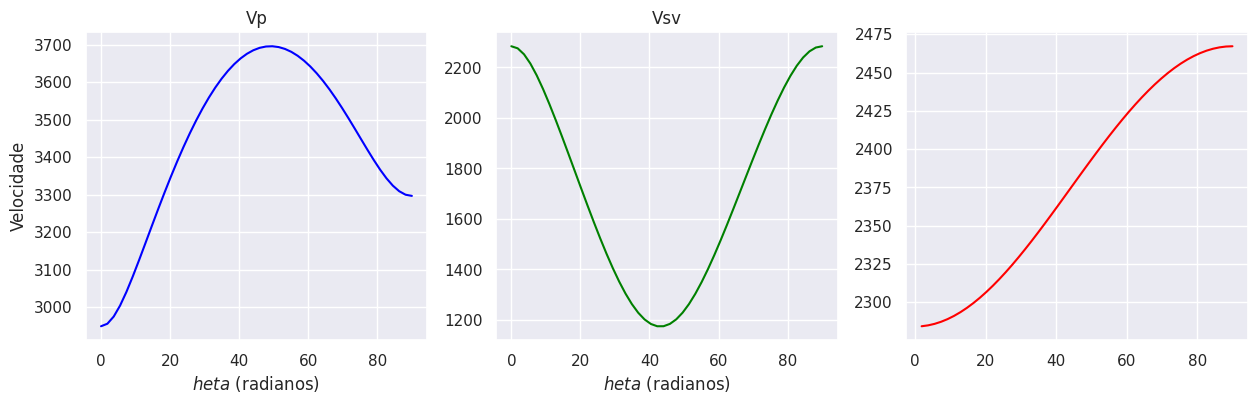

In [13]:
import seaborn as sns
# Configuração do tema escuro do Seaborn
sns.set_theme(style="darkgrid")

# Criação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

# Subplot 1: Vp
sns.lineplot(x=thetas, y=Vp, ax=axes[0], color='blue')
axes[0].set_title('Vp')
axes[0].set_xlabel('$\theta$ (radianos)')
axes[0].set_ylabel('Velocidade')

# Subplot 2: Vsv
sns.lineplot(x=thetas, y=Vsv, ax=axes[1], color='green')
axes[1].set_title('Vsv')
axes[1].set_xlabel('$\theta$ (radianos)')

# Subplot 3: Vsh
sns.lineplot(x=thetas[1:], y=Vsh, ax=axes[2], color='red')
sns.lineplot(x=thetas[0], y=Vsh0, ax=axes[2], color='red')
axes[2].set_title('Vsh')
axes[2].set_xlabel('$\theta$ (radianos)')

# Ajustes de layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


# Criação de um DataFrame com os dados
data = pd.DataFrame({'thetas': thetas, 'velocidadeVsv': velocidadeVsv})
#points = pd.DataFrame({'thetas': [thetas[0], thetas[39]], 'values': [Vsv0, Vsv90]})

# Configurações de estilo do Seaborn
sns.set(style='whitegrid', font_scale=1.2)

# Criação do gráfico de linha com Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='thetas', y='velocidadeVsv', color='black', label='Vsv')
#sns.scatterplot(data=points, x='thetas', y='values', hue=points.index, palette=['g', 'b'], legend=False)
plt.xlabel(r'$\theta$ (radianos)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade $V_{sv}$ em Função de $\\theta$')
plt.legend()
plt.grid(True)
plt.show()







In [ ]:
# Cálculo das variáveis vsh_2 e theta_rad
theta_rad = np.deg2rad(thetas)
vsh_2 = np.sqrt((C66 * np.sin(theta_rad)**2 + C55 * np.cos(theta_rad)**2) / rho)

# Configurações de estilo do Seaborn
sns.set(style='whitegrid', font_scale=1.2)

# Gráfico 1: Velocidade Vsv em função de theta
plt.figure(figsize=(8, 6))
plt.plot(thetas, velocidadeVsv, 'k', label='Vsv', linewidth=2)
plt.scatter(thetas[0], Vsv0, color='g', label='$\\sqrt{C55/\\rho}$')
plt.scatter(thetas[39], Vsv90, color='b', label='$\\sqrt{C55/\\rho}$')
plt.xlabel(r'$\theta$ (radianos)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade $V_{sv}$ em Função de $\\theta$')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Velocidade Vsh em função de theta
plt.figure(figsize=(8, 6))
plt.plot(thetas[1:], velocidadeVsh, 'b--', label='Vsh num', linewidth=2)
plt.plot(thetas, vsh_2, 'r--', label='Vsh', linewidth=2)
plt.scatter(thetas[0], Vsh0, color='g', label='$\\sqrt{C55/\\rho}$')
plt.scatter(thetas[39], Vsh90, color='b', label='$\\sqrt{C66/\\rho}$')
plt.xlabel(r'$\theta$ (radianos)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade $V_{sh}$ em Função de $\\theta$')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 3: Velocidade Vp em função de theta
plt.figure(figsize=(8, 6))
plt.plot(thetas, velocidadeVp, 'k', label='Vp', linewidth=2)
plt.scatter(thetas[0], Vp0, color='g', label='$\\sqrt{C33/\\rho}$')
plt.scatter(thetas[39], Vp90, color='b', label='$\\sqrt{C11/\\rho}$')
plt.xlabel(r'$\theta$ (radianos)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade $V_{p}$ em Função de $\\theta$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
theta_rad = np.deg2rad(thetas)
#velocidadeVsh = velocidadeVsh[1:]
vsh_2 = np.sqrt((C66 * np.sin(theta_rad)**2 + C55 * np.cos(theta_rad)**2) / rho)

# Criação de subplots para as duas partes
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1
axs[0].plot(thetas, velocidadeVsv,'k', linewidth=2)
axs[0].plot(thetas[0], Vsv0,'g',marker = 'o', label='$\\sqrt{C55/\\rho}$')
axs[0].plot(thetas[49], Vsv90,'b',marker = 'o',  label='$\\sqrt{C55/\\rho}$')
axs[0].set_xlabel(r'$\theta$ (radianos)', fontsize=12)  # Rótulo do eixo x em LaTeX
axs[0].set_ylabel('Velocidade (m/s)', fontsize=12)  # Rótulo do eixo y
axs[0].set_title('Velocidade $V_{sv}$ em Função de $\\theta$', fontsize=14)  # Título do gráfico
axs[0].legend()
axs[0].grid(True)
# axs[0].set_xticklabels(axs.get_xticks(),fontsize=14)  # Tamanho da fonte dos ticks no eixo x
# axs[0].set_yticklabels(axs.get_xticks(),fontsize=14)  # Tamanho da fonte dos ticks no eixo y
#axs[0].show()

# Subplot 2
# Subplot 1
axs[1].plot(thetas[1:], velocidadeVsh,'b--', label='Vsh num', linewidth=2)
axs[1].plot(thetas, vsh_2,'r--', label='Vsh', linewidth=2)
axs[1].plot(thetas[0], Vsh0,'g',marker = 'o', label='$\\sqrt{C55/\\rho}$')
axs[1].plot(thetas[49], Vsh90,'b',marker = 'o', label='$\\sqrt{C66/\\rho}$')
axs[1].set_xlabel(r'$\theta$ (radianos)', fontsize=12)  # Rótulo do eixo x em LaTeX
axs[1].set_ylabel('Velocidade (m/s)', fontsize=12)  # Rótulo do eixo y
axs[1].set_title('Velocidade $V_{sh}$ em Função de $\\theta$', fontsize=14)  # Título do gráfico
axs[1].legend()
#axs[1].set_xlim(1,90)
axs[1].grid(True)
# axs[1].set_xticklabels(axs.get_xticks(),fontsize=14)  # Tamanho da fonte dos ticks no eixo x
# axs[1].set_yticklabels(axs.get_xticks(),fontsize=14)  # Tamanho da fonte dos ticks no eixo y
#axs[1].show()
axs[2].plot(thetas, velocidadeVp,'k', linewidth=2)
axs[2].plot(thetas[0], Vp0,'g',marker='o', linewidth=1,  label='$\\sqrt{C33/\\rho}$')
axs[2].plot(thetas[49], Vp90,'b',marker='o', linewidth=1, label='$\\sqrt{C11/\\rho}$')
axs[2].set_xlabel(r'$\theta$ (radianos)', fontsize=12)  # Rótulo do eixo x em LaTeX
axs[2].set_ylabel('Velocidade (m/s)', fontsize=12)  # Rótulo do eixo y
axs[2].set_title('Velocidade $V_{p}$ em Função de $\\theta$', fontsize=14)  # Título do gráfico
axs[2].legend()
#axs[2].set_xlim(1.9,95)
#axs[2].set_ylim(2200,2500)
axs[2].grid(True)
plt.savefig('Velocity_anisotropy.pdf')